In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import random

# Excercise 1

### We import the data, will use 4000 apartments to train and 1000 to test accuracy

In [3]:
df = pd.read_csv("../data/airbnb.csv", sep=",", header=0)

training_df = df.loc[random.sample(list(df.index), 4000)]
print(training_df.shape)

predict_df = df.loc[random.sample(list(df.index), 1000)]
predict_df.shape

(4000, 16)


(1000, 16)

### We classify with a Naive Gaussian classifier and test its accuracy

In [4]:
from sklearn.naive_bayes import GaussianNB

training_features = training_df[["latitude","longitude"]]
training_labels = training_df[["neighbourhood_group"]]

to_predict_features = predict_df[["latitude","longitude"]]
to_predict_labels = predict_df[["neighbourhood_group"]]

# We will train our dataset with 1000 random apartments

gnb = GaussianNB()
predicted_labels = gnb.fit(training_features, training_labels).predict(to_predict_features)

In [37]:
gnb.fit(training_features, training_labels).score(to_predict_features, to_predict_labels)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.862

### Or we can just count cases

In [5]:
good_count = 0
bad_count = 0
for i in range(len(predicted_labels)):
    if predicted_labels[i] == to_predict_labels.values.flatten()[i]:
        good_count+=1
    else:
        bad_count+=1

print ("Good: ", good_count, " Bad: ", bad_count)

Good:  862  Bad:  138


### We repeat the same with a RandomForest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
predicted_labels = rfc.fit(training_features, training_labels).predict(to_predict_features)
rfc.fit(training_features, training_labels).score(to_predict_features, to_predict_labels)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.98

In [7]:
# Lets compare to_predict with predicted!
good_count = 0
bad_count = 0
for i in range(len(predicted_labels)):
    if predicted_labels[i] == to_predict_labels.values.flatten()[i]:
        good_count+=1
    else:
        bad_count+=1

print ("Good: ", good_count, " Bad: ", bad_count)

Good:  981  Bad:  19


## Excercise 2

### Lets "categorize" room type

In [8]:
df["c_room_type"] = pd.factorize(df["room_type"])[0]

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df[["c_room_type","price"]])

In [10]:
print (df[kmeans.labels_ == 0].price.mean())
print (df[kmeans.labels_ == 1].price.mean())
print (df[kmeans.labels_ == 2].price.mean())


85.69732625675947
5815.225
1011.8392857142857


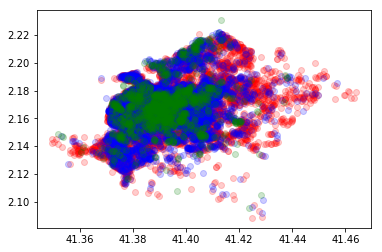

In [53]:
colors = ["r", "g", "b"]

import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(df.latitude[kmeans.labels_ == 0], df.longitude[kmeans.labels_ == 0], "ro", alpha=0.2)
plt.plot(df.latitude[kmeans.labels_ == 1], df.longitude[kmeans.labels_ == 1], "bo", alpha=0.2)
plt.plot(df.latitude[kmeans.labels_ == 2], df.longitude[kmeans.labels_ == 2], "go", alpha=0.2)


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 

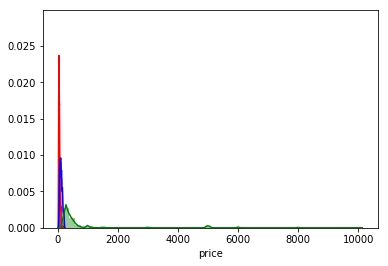

In [52]:
sns.distplot(df.price[kmeans.labels_ == 0], color="red")
sns.distplot(df.price[kmeans.labels_ == 1], color="blue")
sns.distplot(df.price[kmeans.labels_ == 2], color="green")


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 

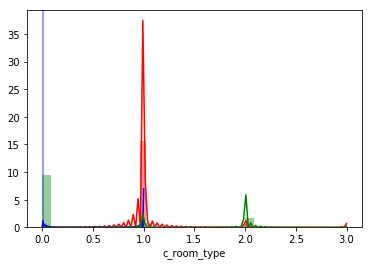

In [51]:
sns.distplot(df.c_room_type[kmeans.labels_ == 0], color="red")
sns.distplot(df.c_room_type[kmeans.labels_ == 1], color="blue")
sns.distplot(df.c_room_type[kmeans.labels_ == 2], color="green")


### The categories don't look so good, lets normalize features

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['n_price'] = scaler.fit_transform(df['price'].values.reshape(-1,1))

In [15]:
kmeans = KMeans(n_clusters=3).fit(df[["c_room_type","n_price"]])

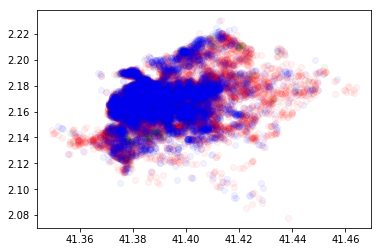

In [16]:
plt.plot(df.latitude[kmeans.labels_ == 0], df.longitude[kmeans.labels_ == 0], "ro", alpha=0.05)
plt.plot(df.latitude[kmeans.labels_ == 2], df.longitude[kmeans.labels_ == 2], "go", alpha=0.05)
plt.plot(df.latitude[kmeans.labels_ == 1], df.longitude[kmeans.labels_ == 1], "bo", alpha=0.05)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 

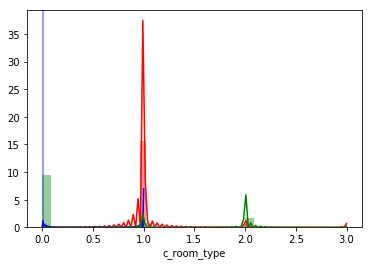

In [50]:
sns.distplot(df.c_room_type[kmeans.labels_ == 0],color="red")
sns.distplot(df.c_room_type[kmeans.labels_ == 1],color="blue")
sns.distplot(df.c_room_type[kmeans.labels_ == 2],color="green")


### Lets normalize as well the room type

In [18]:
df['n_type'] = scaler.fit_transform(df['c_room_type'].values.reshape(-1,1))

In [19]:
kmeans = KMeans(n_clusters=3).fit(df[["n_type","n_price"]])

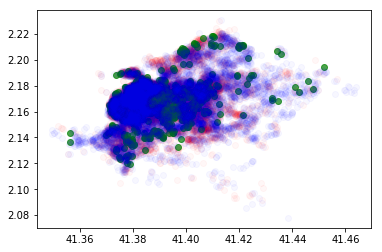

In [20]:
plt.plot(df.latitude[kmeans.labels_ == 0], df.longitude[kmeans.labels_ == 0], "ro", alpha=0.03)
plt.plot(df.latitude[kmeans.labels_ == 2], df.longitude[kmeans.labels_ == 2], "go", alpha=0.7)
plt.plot(df.latitude[kmeans.labels_ == 1], df.longitude[kmeans.labels_ == 1], "bo", alpha=0.03)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 

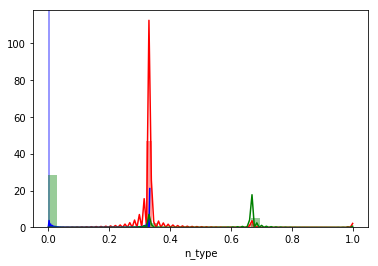

In [49]:
sns.distplot(df.n_type[kmeans.labels_ == 0],color="red")
sns.distplot(df.n_type[kmeans.labels_ == 1],color="blue")
sns.distplot(df.n_type[kmeans.labels_ == 2],color="green")


### Logarithm of the price?

In [22]:
import numpy as np
df['l_price'] = np.log(df['price'])
df.dropna(inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [23]:
kmeans = KMeans(n_clusters=3).fit(df[["c_room_type","l_price"]])

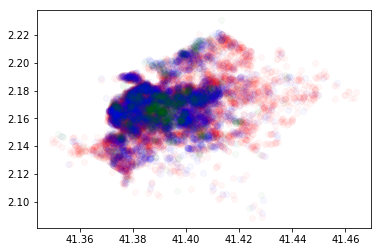

In [44]:
plt.plot(df.latitude[kmeans.labels_ == 0], df.longitude[kmeans.labels_ == 0], "ro", alpha=0.03)
plt.plot(df.latitude[kmeans.labels_ == 1], df.longitude[kmeans.labels_ == 1], "bo", alpha=0.03)
plt.plot(df.latitude[kmeans.labels_ == 2], df.longitude[kmeans.labels_ == 2], "go", alpha=0.03)


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 

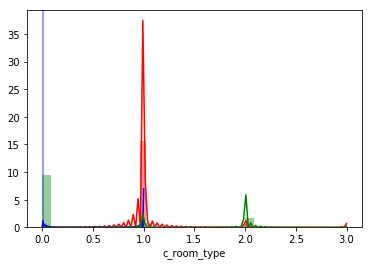

In [48]:
sns.distplot(df.c_room_type[kmeans.labels_ == 0], color="red")
sns.distplot(df.c_room_type[kmeans.labels_ == 1], color="blue")
sns.distplot(df.c_room_type[kmeans.labels_ == 2], color="green")


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 

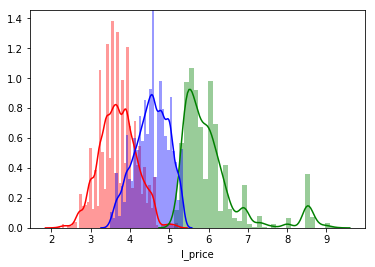

In [39]:
sns.distplot(df.l_price[kmeans.labels_ == 0], color="red")
sns.distplot(df.l_price[kmeans.labels_ == 1], color="blue")
sns.distplot(df.l_price[kmeans.labels_ == 2], color="green")


### Lets draw a map

In [55]:
BBox = ((df.longitude.min(),   df.longitude.max(), df.latitude.min(), df.latitude.max()))
BBox

(2.08838, 2.23057, 41.349540000000005, 41.464009999999995)

### I downloaded manually the image from https://www.openstreetmap.org/export#map=12/41.4067/2.1595

In [31]:
ruh_m = plt.imread('/home/lradusky/Pictures/map.png')

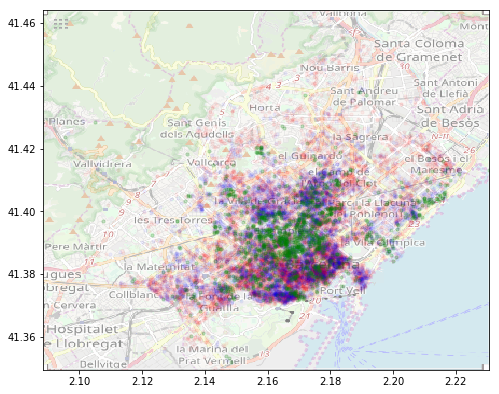

In [47]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude[kmeans.labels_ == 0], df.latitude[kmeans.labels_ == 0], zorder=1, alpha= 0.05, c='r', s=10)
ax.scatter(df.longitude[kmeans.labels_ == 1], df.latitude[kmeans.labels_ == 1], zorder=1, alpha= 0.05, c='b', s=10)
ax.scatter(df.longitude[kmeans.labels_ == 2], df.latitude[kmeans.labels_ == 2], zorder=1, alpha= 0.2, c='g', s=10)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, alpha=0.5, zorder=0, extent = BBox, aspect= 'equal')